**<h1>Exploratory Data Analysis</h1>**
We'll cover EDA alongside data cleaning and feature engineering, cleaning the data as we gain insights and data trends exhibited by the data, and adding more derived features to explore the data further. 
We may follow the following steps:  
- **EDA and Data Cleaning**
- **Missing data imputation**
- **Feature engineering**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("/home/lyrax/matplotlib-dracula/dracula.mplstyle")
import seaborn as sns

from tqdm import tqdm, trange

In [2]:
data = pd.read_excel("Claims Data 2.xlsx", parse_dates=['participant_date_of_birth', 'treatment_created_date', 'claim_finalized_date'])
data.sample(3)

,Serial Number,claim_status,provider_type,provider_region,program_type,program_cover,participant_date_of_birth,participant_gender,treatment_created_date,claim_finalized_date,item_status,item_name,item_amount,item_currency,item_quantity,total_item_amount,diagnoses,treatment_type
0,162967.0,Approved,Specialist,NAIROBI,Insurance,DENTAL,1987-12-19,FEMALE,2021-01-19 10:45:21,2021-01-19 22:38:08,APPROVED,Simple Extraction Permanent,3000.0,KES,1,3000.0,Dental caries,OUTPATIENT
1,162967.0,Approved,Specialist,NAIROBI,Insurance,DENTAL,1987-12-19,FEMALE,2021-01-19 10:45:21,2021-01-19 22:38:08,APPROVED,Dental Consultation,1500.0,KES,1,1500.0,Dental caries,OUTPATIENT
2,164883.0,Approved,Specialist,NAIROBI,Insurance,DENTAL,1977-01-01,FEMALE,2021-01-22 10:49:08,2021-01-28 10:48:12,APPROVED,Dental consultation,1500.0,KES,1,1500.0,Dental caries,OUTPATIENT
3,164883.0,Approved,Specialist,NAIROBI,Insurance,DENTAL,1977-01-01,FEMALE,2021-01-22 10:49:08,2021-01-28 10:48:12,APPROVED,Iopa7,1000.0,KES,1,1000.0,Dental caries,OUTPATIENT
4,164883.0,Approved,Specialist,NAIROBI,Insurance,DENTAL,1977-01-01,FEMALE,2021-01-22 10:49:08,2021-01-28 10:48:12,APPROVED,Composite Filling,5000.0,KES,3,15000.0,Dental caries,OUTPATIENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170990,204549.0,Submitted,Clinic,NYERI,Insurance,OUT-PATIENT,1992-05-05,FEMALE,2021-03-25 14:17:33,NaT,SUBMITTED,H.Pylori Antigen Detection In Stool,1400.0,KES,1,1400.0,Gastroenteritis and colitis due to radiation,OUTPATIENT
170991,204549.0,Submitted,Clinic,NYERI,Insurance,OUT-PATIENT,1992-05-05,FEMALE,2021-03-25 14:17:33,NaT,SUBMITTED,Esomeprazole 40mg/Itopride 150mg capsules 30s,25.0,KES,10,250.0,Gastroenteritis and colitis due to radiation,OUTPATIENT
170992,204549.0,Submitted,Clinic,NYERI,Insurance,OUT-PATIENT,1992-05-05,FEMALE,2021-03-25 14:17:33,NaT,SUBMITTED,Ofloxacin/Ornidazole 200mg/500mg tablets,58.0,KES,10,580.0,Gastroenteritis and colitis due to radiation,OUTPATIENT
170993,204549.0,Submitted,Clinic,NYERI,Insurance,OUT-PATIENT,1992-05-05,FEMALE,2021-03-25 14:17:33,NaT,SUBMITTED,Revist Consultation,0.0,KES,1,0.0,Gastroenteritis and colitis due to radiation,OUTPATIENT


In [59]:
# shape of dataset
data.shape

(170995, 17)

In [3]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170995 entries, 0 to 170994
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Serial Number              170321 non-null  float64       
 1   claim_status               170995 non-null  object        
 2   provider_type              144502 non-null  object        
 3   provider_region            167860 non-null  object        
 4   program_type               170995 non-null  object        
 5   program_cover              170995 non-null  object        
 6   participant_date_of_birth  170989 non-null  datetime64[ns]
 7   participant_gender         170989 non-null  object        
 8   treatment_created_date     170995 non-null  datetime64[ns]
 9   claim_finalized_date       154567 non-null  datetime64[ns]
 10  item_status                170995 non-null  object        
 11  item_name                  170995 non-null  object  

In [4]:
# missing data statistics as percentage
data.isnull().sum() *100 / len(data)

Serial Number                 0.394164
claim_status                  0.000000
provider_type                15.493435
provider_region               1.833387
program_type                  0.000000
program_cover                 0.000000
participant_date_of_birth     0.003509
participant_gender            0.003509
treatment_created_date        0.000000
claim_finalized_date          9.607298
item_status                   0.000000
item_name                     0.000000
item_amount                   0.000000
item_currency                 0.000000
item_quantity                 0.000000
total_item_amount             0.000000
diagnoses                     2.800082
treatment_type                0.000000
dtype: float64

In [11]:
# Serial number
data['Serial Number'].nunique()

52187

In [12]:
len(data)

170995

Serial number column seems to be an identity column representing the customer in question.  
So the data covers information of 52187 customers.

Approved             153549
Submitted              7392
PartiallyRejected      5978
ReSubmitted            3058
Rejected               1018
Name: claim_status, dtype: int64


<AxesSubplot:xlabel='count', ylabel='claim_status'>

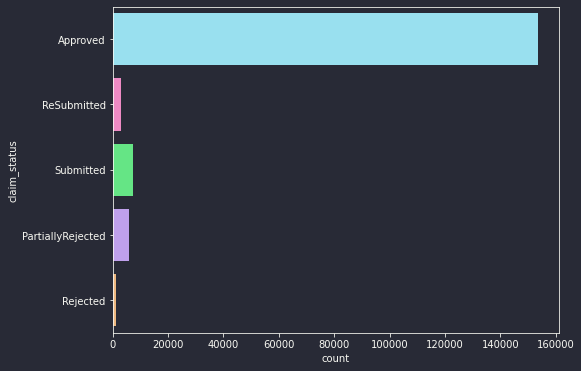

In [5]:
# claim status distribution
print(data.claim_status.value_counts())
plt.figure(figsize=(8,6))
sns.countplot(y=data.claim_status)

Let's mark the status as _Approved_ or _Not Approved_ as this is the information the company will ultimately require to know, whether an insurance claim is either approved or not.

Approved        153549
Not Approved     17446
Name: claim_status, dtype: int64


<AxesSubplot:xlabel='claim_status', ylabel='count'>

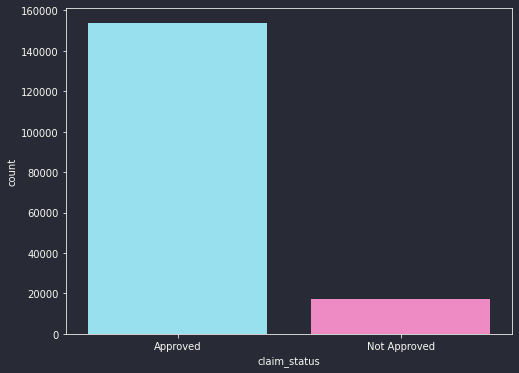

In [6]:
data.claim_status.replace(['ReSubmitted', 'Submitted', 'PartiallyRejected', 'Rejected'], 'Not Approved', inplace=True)
print(data.claim_status.value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x=data.claim_status)

We can see the imbalance in these two categories. We'll have to consider and be cautious of this imbalance while building a claim status classifier.  
We may consider one of the following techniques(after trying all and comparing the results):  
- Oversampling
- Undersampling
- A mixture of both oversampling and undersampling

Clinic                         106374
Hospital                        15369
Medical Clinic/ Centre           5891
Specialist                       4868
Medical Centre                   4681
Health Centre                    3706
Nursing Home                     2052
Medical Clinic                    833
Clinic, Level 1                   281
Maternity And Nursing Home        241
Primary Hospital-Category 2        85
Dentists                           76
Pharmacy                           30
Radiology Unit                     15
Name: provider_type, dtype: int64


<AxesSubplot:xlabel='count', ylabel='provider_type'>

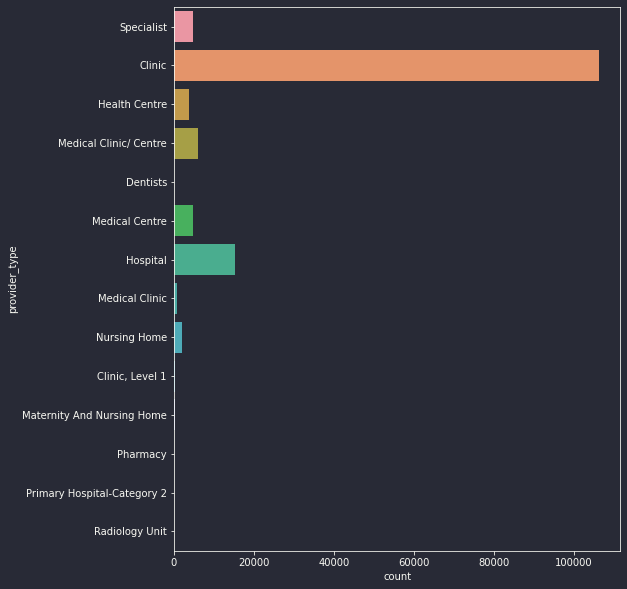

In [14]:
# provider type
print(data.provider_type.value_counts())
plt.figure(figsize=(8,10))
sns.countplot(y=data.provider_type)

Let's correct the redundancy:

Clinic            121766
Hospital           17747
Specialist          4868
Dentists              76
Pharmacy              30
Radiology Unit        15
Name: provider_type, dtype: int64


<AxesSubplot:xlabel='count', ylabel='provider_type'>

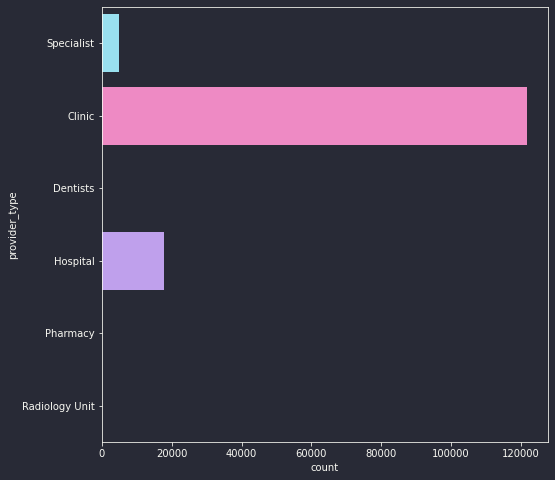

In [16]:
data.provider_type.replace(['Medical Clinic/ Centre', 'Medical Clinic', 'Clinic, Level 1', 'Medical Centre', 'Health Centre'],
                           'Clinic', inplace=True)
data.provider_type.replace(['Nursing Home', 'Maternity And Nursing Home', 'Primary Hospital-Category 2'], 'Hospital', inplace=True)

print(data.provider_type.value_counts())
plt.figure(figsize=(8,8))
sns.countplot(y=data.provider_type)

In [24]:
# provider region
print(f"Number of regions: {data.provider_region.nunique()}\n")
print(data.provider_region.value_counts())

Number of regions: 46

NAIROBI            69785
MOMBASA            15038
KISUMU              9964
KIAMBU              8480
KAKAMEGA            6596
NAKURU              4621
BUNGOMA             4553
KAJIADO             4206
TRANS-NZOIA         4073
UASIN GISHU         4033
KISII               2954
KERICHO             2816
NYERI               2611
MIGORI              2529
MACHAKOS            2448
KILIFI              2289
NANDI               2198
LAIKIPIA            2017
MERU                1861
GARISSA             1450
BUSIA               1428
SIAYA               1326
EMBU                1297
HOMABAY             1264
BARINGO             1242
KIRINYAGA           1125
TAITA-TAVETA        1025
KITUI                924
TURKANA              606
BOMET                397
MAKUENI              383
ISIOLO               359
WAJIR                342
KWALE                313
MURANG'A\n           285
VIHIGA               245
NAROK                211
WEST POKOT           137
MARSABIT             115
TH

Region clearly represents counties.

In [34]:
# correct error in MURANG'A listing
data.provider_region.replace("MURANG'A\n", "MURANG'A", inplace=True)

In [37]:
# program type
data.program_type.value_counts()

Insurance    170995
Name: program_type, dtype: int64

In [38]:
# drop the program type column as it has only one unique value
data.drop('program_type', axis=1, inplace=True)

In [40]:
# program cover
data.program_cover.value_counts()

OUT-PATIENT                                           124976
OUTPATIENT                                             27489
Outpatient                                              5243
DENTAL                                                  4235
OPTICAL                                                 2875
outpatient                                              2135
AAR - OP                                                1281
OUT-PATIENT                                              965
Out-Patient                                              296
OUTPATIENT                                               223
Dental                                                   205
Out Patient                                              201
ANNUAL MEDICAL CHECK-UP                                  165
SPECTACLE FRAME                                          150
Optical                                                  115
BABY FRIENDLY VACCINES / WELL BABY CLINIC                 93
OUTPATIENT              

Remove redundancy:

In [42]:
data.program_cover.unique()

array(['DENTAL', 'OUTPATIENT', 'OUT-PATIENT', 'AAR-Outpatient',
       'outpatient', 'OPTICAL', 'OUT-PATIENT ', 'Dental', 'Outpatient',
       'Annual check up', 'OUTPATIENT ', 'ANNUAL_CHECKUP', 'Out-Patient',
       'VACCINES - PRIVATE VACCINES', 'Well Baby Clinic', 'AAR - OP',
       'ANNUAL MEDICAL CHECK-UP', 'Out Patient',
       'BABY FRIENDLY VACCINES / WELL BABY CLINIC', 'OUTPATIENT   ',
       'ANNUAL MEDICAL CHECK-UP FOR MAIN MEMBER / EMPLOYEE',
       'ANNUAL_CHECK-UP', 'dental', 'MATERNITY', 'ANNUAL CHECKUP',
       'ANNUAL MEDICAL CHECK-UP at AAR healthcare clinics',
       'BABY FRIENDLY VACCINES', 'Baby Friendly', 'AAR - Dental',
       'SPECTACLE FRAME', 'Optical', 'AAR - Optical',
       'AAR - Spectacle Frame', 'optical', 'AAR- Checkup'], dtype=object)

In [43]:
data.program_cover.replace(['OUT-PATIENT', 'AAR-Outpatient', 'outpatient', 'OUT-PATIENT ', 'Outpatient', 'OUTPATIENT ',
                           'Out-Patient', 'AAR - OP', 'Out Patient', 'OUTPATIENT   '], 'OUTPATIENT', inplace=True)
data.program_cover.replace(['Dental', 'dental', 'AAR - Dental'], 'DENTAL', inplace=True)
data.program_cover.replace(['Optical', 'AAR - Optical', 'optical', 'SPECTACLE FRAME', 'AAR - Spectacle Frame'], 'OPTICAL', inplace=True)
data.program_cover.replace(['Annual check up', 'ANNUAL_CHECKUP', 'ANNUAL MEDICAL CHECK-UP',
                            'ANNUAL MEDICAL CHECK-UP FOR MAIN MEMBER / EMPLOYEE', 'ANNUAL_CHECK-UP',
                            'ANNUAL MEDICAL CHECK-UP at AAR healthcare clinics', 'AAR- Checkup'], 'ANNUAL CHECKUP', inplace=True)
data.program_cover.replace(['VACCINES - PRIVATE VACCINES', 'Well Baby Clinic', 'BABY FRIENDLY VACCINES / WELL BABY CLINIC',
                           'MATERNITY', 'BABY FRIENDLY VACCINES', 'Baby Friendly'], 'BABY FRIENDLY', inplace=True)

data.program_cover.unique()

array(['DENTAL', 'OUTPATIENT', 'OPTICAL', 'ANNUAL CHECKUP',
       'BABY FRIENDLY'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='program_cover'>

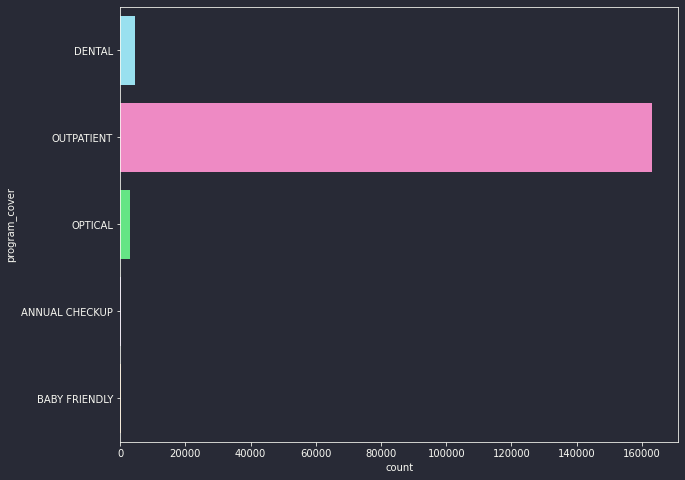

In [44]:
plt.figure(figsize=(10,8))
sns.countplot(y=data.program_cover)

In [55]:
# oldest participant/customer
print(f"Oldest participant is {2021 - data.participant_date_of_birth.min().year} years old\n\
Date of birth: {data.participant_date_of_birth.min()}")

Oldest participant is 93 years old
Date of birth: 1928-10-05 00:00:00


In [56]:
# youngest
print(f"Youngest participant is {2021 - data.participant_date_of_birth.max().year} years old\n\
Date of birth: {data.participant_date_of_birth.max()}")

Youngest participant is 0 years old
Date of birth: 2021-07-01 00:00:00


New features from DOB:


In [61]:
data.sample(3)

,Serial Number,claim_status,provider_type,provider_region,program_cover,participant_date_of_birth,participant_gender,treatment_created_date,claim_finalized_date,item_status,item_name,item_amount,item_currency,item_quantity,total_item_amount,diagnoses,treatment_type
98612,191045.0,Not Approved,Hospital,HOMABAY,OUTPATIENT,1990-01-14,FEMALE,2021-03-04 07:46:41,NaT,SUBMITTED,Haemoglobin,350.0,KES,1,350.0,Folate deficiency anaemia,OUTPATIENT
158472,185192.0,Approved,Clinic,NAIROBI,OUTPATIENT,1997-06-24,MALE,2021-02-24 07:46:23,2021-02-26 13:27:50,APPROVED,MALARIA PARASITES (QBC),600.0,KES,1,600.0,Encounter for administrative examination,OUTPATIENT
58236,184856.0,Approved,Clinic,BUNGOMA,OUTPATIENT,1990-12-28,MALE,2021-02-23 11:30:26,2021-02-23 17:18:57,APPROVED,Consultation General Practioner,600.0,KES,1,600.0,Plasmodium falciparum malaria(uncomplicated),OUTPATIENT


In [70]:
# save below two cells for feature engineering

In [69]:
data['participant_yearOB'] = data.participant_date_of_birth.dt.year.astype(int)
data['participant_monthOB'] = data.participant_date_of_birth.dt.month.astype(int)
data['participant_dayOB'] = data.participant_date_of_birth.dt.day.astype(int)

data.sample(3)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [68]:
data.participant_date_of_birth.dt.day_name().map({'Monday': 'weekday', 'Tuesday': 'weekday', 'Wednesday': 'weekday',
                                                  'Thursday': 'weekday', 'Friday': 'weekday', 'Saturday': 'weekend', 'Sunday': 'weekend'})

0         weekend
1         weekend
2         weekend
3         weekend
4         weekend
           ...   
170990    weekday
170991    weekday
170992    weekday
170993    weekday
170994    weekday
Name: participant_date_of_birth, Length: 170995, dtype: object

FEMALE    95751
MALE      75238
Name: participant_gender, dtype: int64


<AxesSubplot:xlabel='participant_gender', ylabel='count'>

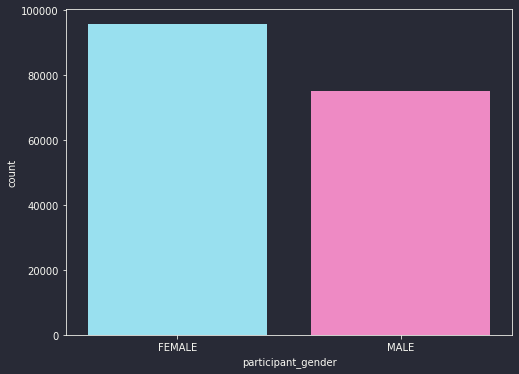

In [57]:
# gender
print(data.participant_gender.value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x=data.participant_gender)

In [60]:
data.sample(3)

,Serial Number,claim_status,provider_type,provider_region,program_cover,participant_date_of_birth,participant_gender,treatment_created_date,claim_finalized_date,item_status,item_name,item_amount,item_currency,item_quantity,total_item_amount,diagnoses,treatment_type
103725,186593.0,Approved,NaN,KAKAMEGA,OUTPATIENT,2017-09-09,FEMALE,2021-02-25 10:43:23,2021-03-17 07:15:18,APPROVED,Cetrizine 5mg/5mls syrup 60mls,350.00,KES,1,350.0,Bronchitis; not specified as acute or chronic,OUTPATIENT
122360,201401.0,Approved,Clinic,NAIROBI,OUTPATIENT,2009-09-05,MALE,2021-03-17 14:23:27,2021-03-25 10:53:07,APPROVED,STOOL SALMONELLA ANTIGEN,3300.00,KES,1,3300.0,Plasmodium falciparum malaria(uncomplicated),OUTPATIENT
30134,185428.0,Approved,NaN,KISUMU,OUTPATIENT,1961-03-21,MALE,2021-02-24 07:32:18,2021-03-01 15:21:58,APPROVED,Losartas HT 50mg/12.5mg Tablets 30s,18.13,KES,30,543.9,Hypertension,OUTPATIENT
